<a href="https://colab.research.google.com/github/Quan21046403/Ai/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#NguyenToanQuan 21046403
#Nhan dang loai Hoa

In [ ]:
from os import listdir
import numpy as np
from numpy import asarray, save
from keras.utils import load_img, img_to_array
from google.colab import drive 
from keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder='/content/drive/MyDrive/Flower'
photos,labels=list(),list()

for file in listdir(folder):
   if file.endswith('.jpg'):
     output=0
     if file.startswith('Apricot'):
       output=1
     if file.startswith('Blossom'):
       output=2
     if file.startswith('Rose'):
       output=3
     if file.startswith('Sunflower'):
       output=4
     if file.startswith('Tulip'):
       output=5
     photo=load_img(folder+'/'+file,target_size=(170,170))
     photo=img_to_array(photo)
     photos.append(photo)
     labels.append(output)

photos=asarray(photos)
labels=asarray(labels)

print(photos.shape,labels.shape)

save('flowers_photos.npy',photos)
save('flowers_labels.npy',labels)

(5, 170, 170, 3) (5,)


In [ ]:
import pickle
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
file=open('pix.data','wb')
pickle.dump((photos,labels),file)
file.close()

def load_data():
    file=open('pix.data','rb')
    (photos, labels)=pickle.load(file)
    file.close()
    return photos, labels

X,y=load_data()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (4, 170, 170, 3)
X_test: (1, 170, 170, 3)
y_train: (4, 5)
y_test: (1, 5)


In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,LeakyReLU,Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras import losses
   
classes=5

X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(170,170,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 170, 170, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 170, 170, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 85, 85, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                    

In [ ]:
# Training
batch_size=18
epochs=30   

model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 1.5603 - accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 1s 672ms/step - loss: 0.3251 - accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 1s 674ms/step - loss: 0.4936 - accuracy: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 500ms/step - loss: 0.3641 - accuracy: 0.7500
Epoch 5/30
1/1 [==============================] - 0s 407ms/step - loss: 0.0167 - accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 0s 459ms/step - loss: 3.5088e-04 - accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 425ms/step - loss: 2.7763e-04 - accuracy: 1.0000
Epoch 8/30
1/1 [==============================] - 0s 433ms/step - loss: 8.4986e-04 - accuracy: 1.0000
Epoch 9/30
1/1 [==============================] - 0s 416ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 10/30
1/1 [==============================] - 0s 460ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 11/3

In [ ]:
model.save("/content/drive/MyDrive/Flower/Tulip")

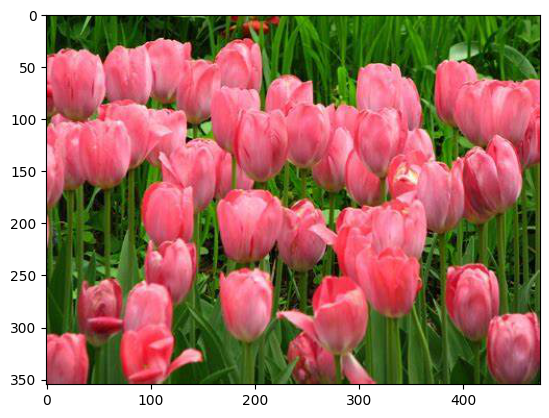

In [ ]:
from keras.saving.saving_lib import load_model
from keras.models import load_model
import matplotlib.pyplot as plt

model=load_model("/content/drive/MyDrive/Flower/Tulip")
img=load_img('/content/drive/MyDrive/Flower/Tulip.jpg')
plt.imshow(img)
plt.show()

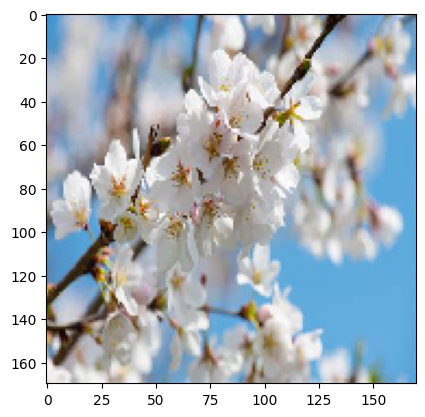

In [ ]:
img=load_img('/content/drive/MyDrive/Flower/Blossom.jpg',target_size=(170,170))
plt.imshow(img)

In [ ]:
class_name = ['Apricot','Blossom','Rose','Sunflower','Tulip']
img=img_to_array(img)
img=img.reshape(1,170,170,3)
img=img.astype('float32')
img=img/255
predict=model.predict(img)
print("This is ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))
     

1/1 [==============================] - 0s 280ms/step
This is  Sunflower [5.0030864e-04 1.1388526e-34 0.0000000e+00 9.9949968e-01 5.2202358e-09]
0.9994997


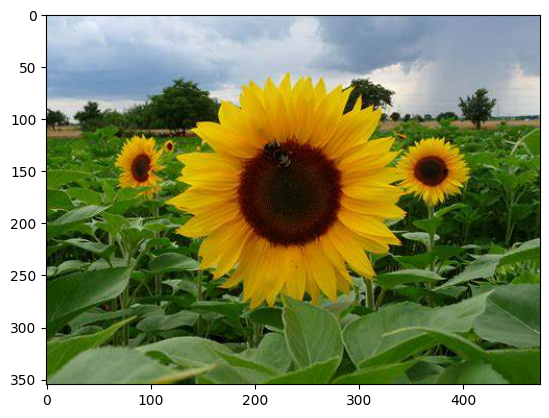

1/1 [==============================] - 0s 108ms/step
This is  Sunflower [3.2403704e-19 1.9289215e-27 3.2282374e-37 1.0000000e+00 3.9034067e-17]
1.0


In [ ]:
img2=load_img('/content/drive/MyDrive/Flower/Sunflower.jpg')
plt.imshow(img2)
plt.show()

img2=load_img('/content/drive/MyDrive/Flower/Sunflower.jpg',target_size=(170,170))
img2=img_to_array(img2)
img2=img2.reshape(1,170,170,3)
img2=img2.astype('float32')
img2=img2/255
predict=model.predict(img2)
print("This is ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))